In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cal = './bos_calendar.csv'
lis = './bos_listings.csv'
rev = './bos_reviews.csv'

In [ ]:
'''
OJECTIVE 1 

First order of business is to explore how Boston listing price behaves over time.
To do so we have to calculate the daily mean price and plot it against time.

''''

In [3]:
'''
To extract data from bos_calendar.csv and to load it into a DataFrame

'''

df_cal = pd.read_csv(cal)

In [4]:
'''
To clean and transform data for exploration.

'''

# To turn off wanrings.
warnings.filterwarnings('ignore')

# To convert 'date' column to datetime format.
df_cal['date'] = pd.to_datetime(df_cal['date'], format='%Y-%m-%d')

# To convert data in 'price' column to numeric and store it in 'listing_price' column.
# To drop 'price' column.
df_cal['listing_price'] = np.nan
df_cal['price'] = df_cal['price'].astype(str)
df_cal['listing_price'][df_cal['price'].notnull()] = df_cal['price'].apply(lambda x: re.sub('[$,]','',x)).astype(float)
df_cal['listing_price'][df_cal['listing_price'].isnull()] = 0.0
df_cal = df_cal.drop(columns='price')
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
listing_id       1308890 non-null int64
date             1308890 non-null datetime64[ns]
available        1308890 non-null object
listing_price    1308890 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 39.9+ MB


In [5]:
# To explore the distribution of listing price.
df_cal['listing_price'].describe()

count    1.308890e+06
mean     9.748990e+01
std      1.605752e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.500000e+02
max      7.163000e+03
Name: listing_price, dtype: float64

In [6]:
# To consider only available listings and to limit the price ot under $1,500 (75th percentile).
df_cal = df_cal[df_cal['available']=='t']
df_cal = df_cal[df_cal['listing_price']<1500]
df_cal.head()

,listing_id,date,available,listing_price
365,3075044,2017-08-22,t,65.0
366,3075044,2017-08-21,t,65.0
367,3075044,2017-08-20,t,65.0
368,3075044,2017-08-19,t,75.0
369,3075044,2017-08-18,t,75.0


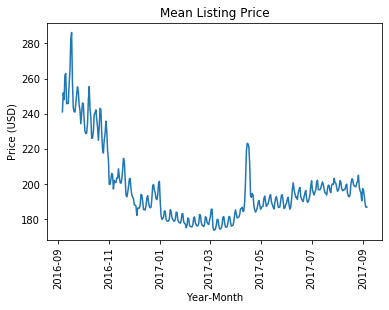

In [7]:
'''
To visualize data in bos_calendar in order to develop insights.

'''

# To plot the daily mean listing price over time in a line chart.
df_plt = df_cal[['listing_price','date']].groupby('date').mean()
plt.plot(df_plt)
plt.title('Mean Listing Price')
plt.xticks(rotation=90)
plt.xlabel('Year-Month')
plt.ylabel('Price (USD)')
plt.show()

In [8]:
# To create a 2nd 'date' column with only year and month.
df_cal['date2'] = np.nan
df_cal['date2'] = df_cal['date'].apply(lambda x: str(x.year)+ "-" + str(x.strftime('%m')))
df_cal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 642259 entries, 365 to 1308879
Data columns (total 5 columns):
listing_id       642259 non-null int64
date             642259 non-null datetime64[ns]
available        642259 non-null object
listing_price    642259 non-null float64
date2            642259 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 29.4+ MB


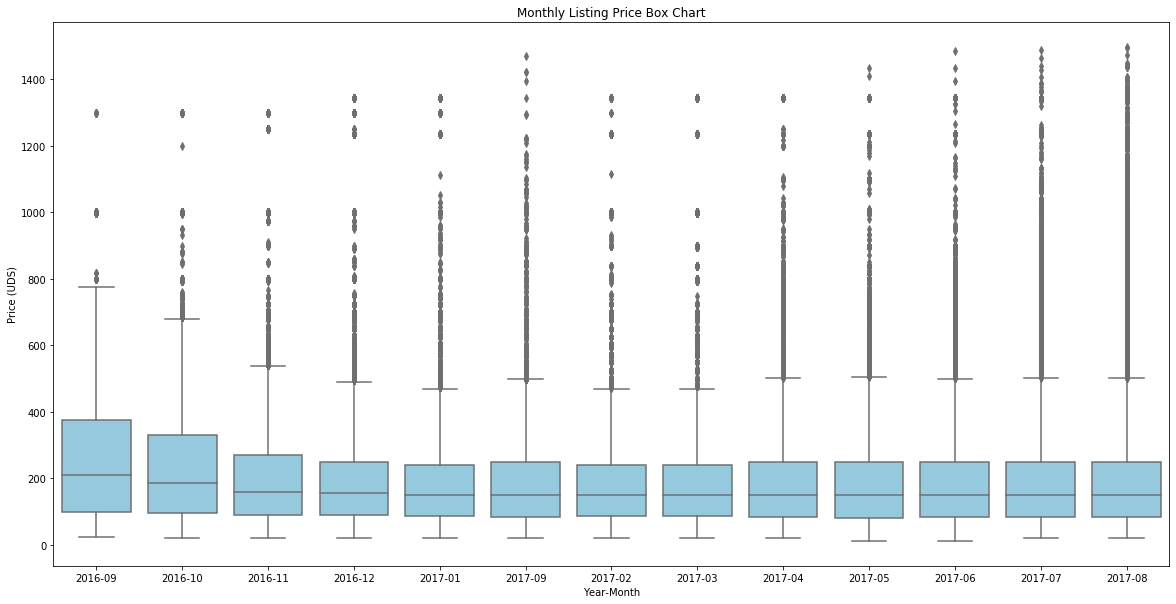

In [9]:
# To plot the monthly mean listing price over time in a box chart.
plt.figure(figsize=(20,10))
order = df_cal['date2'].unique().tolist()
order.reverse()
box = sns.boxplot(x=df_cal['date2'], y=df_cal['listing_price'], color='skyblue', order=order)
box.set(title='Monthly Listing Price Box Chart',xlabel='Year-Month', ylabel='Price (UDS)')
plt.show()